In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)


Query Date:  2016-08-23


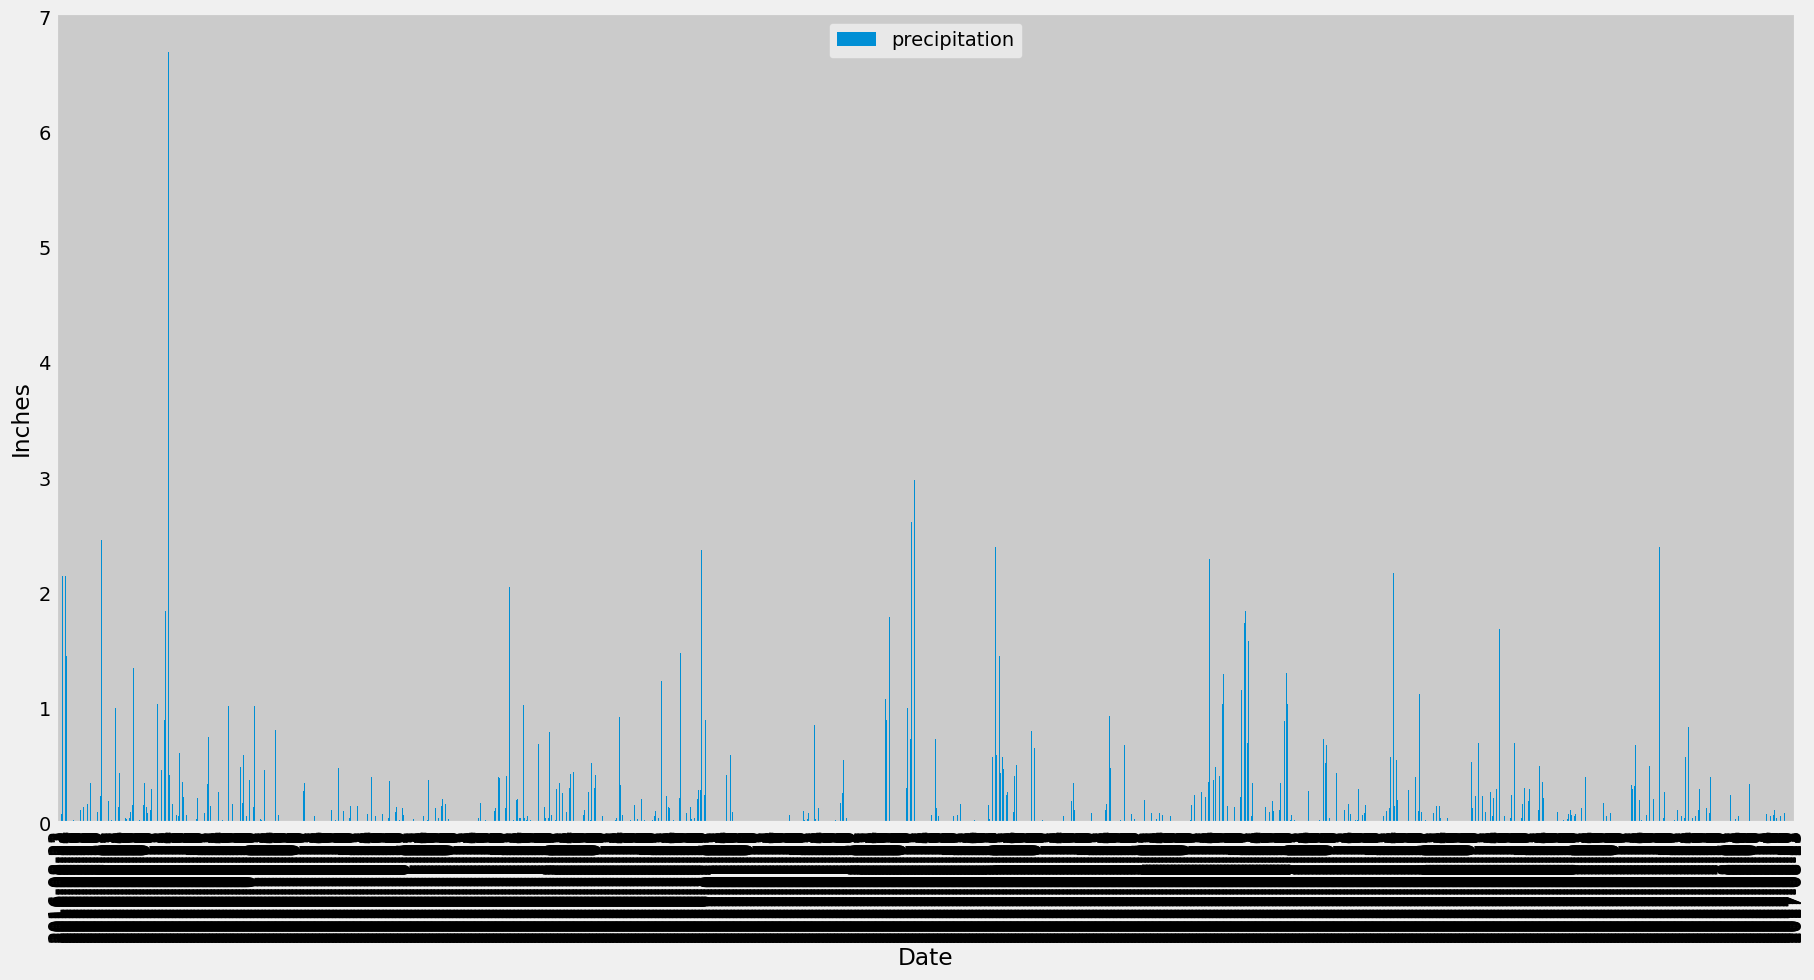

In [11]:
# Perform a query to retrieve the data and precipitation scores
precip = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date <= '2017-08-23').\
            filter(Measurement.date >= '2016-08-23').\
            order_by(Measurement.date).all()

precipitation = Measurement.prcp

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(precip, columns=['date', 'precipitation'])

# Sort the dataframe by date
df.set_index('date', inplace=True)

#len(df)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot.bar(width=0.5, figsize=(20,10))
plt.xticks(rotation=90)
#plt.xlim(0)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(loc='upper center')
#plt.tight_layout()
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number of stations in the dataset

session.query(Station).distinct().count()


9

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Station ID USC00519281 has the greatest number of observations at 2772

In [27]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
stat_temp = [Measurement.station, 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]
active_stat = session.query(*stat_temp).\
    filter(Measurement.station == "USC00519281")
active_stat

# session.query(func.max(Measurement.tobs)).scalar()

# session.query(Measurement.station, func.min(Measurement.tobs),func.max(Measurement.tobs),
#                                  func.avg(Measurement.tobs), func.max(Measurement.tobs), func.min(Measurement.tobs).\
#                                  filter(Measurement.station == "USC00519281"))

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station an(Measurement.tobs), func.min(filter(Measurement.station == 'USC00519281')d plot the results as a histogram


# Close Session

In [ ]:
# Close Session
session.close()